The comapny I have chosen is Apple and the ticker symbol is APPL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm
import statsmodels.api as sm



**Part I: Working with Time Series Data**

In [ ]:
import pandas as pd

# Importing Apple Inc. historical stock prices dataset
df = pd.read_csv("AAPL.csv", index_col='Date', parse_dates=True)

# Displaying the first five rows of the dataset
print(df.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-21  168.910004  171.529999  165.910004  166.419998  165.417953   
2022-04-22  166.460007  167.869995  161.500000  161.789993  160.815826   
2022-04-25  161.119995  163.169998  158.460007  162.880005  161.899277   
2022-04-26  162.250000  162.339996  156.720001  156.800003  155.855896   
2022-04-27  155.910004  159.789993  155.380005  156.570007  155.627274   

              Volume  
Date                  
2022-04-21  87227800  
2022-04-22  84882400  
2022-04-25  96046400  
2022-04-26  95623200  
2022-04-27  88063200  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-04-21 to 2023-04-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


The following dataframe is time indexed as it contains various values that indicate time and date related values

In [ ]:
print(df.index)

DatetimeIndex(['2022-04-21', '2022-04-22', '2022-04-25', '2022-04-26',
               '2022-04-27', '2022-04-28', '2022-04-29', '2022-05-02',
               '2022-05-03', '2022-05-04',
               ...
               '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13',
               '2023-04-14', '2023-04-17', '2023-04-18', '2023-04-19',
               '2023-04-20', '2023-04-21'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)


In [ ]:
print(df.index.max())
print(df.index.min())

print(df.index.argmax())
print(df.index.argmin())

2023-04-21 00:00:00
2022-04-21 00:00:00
251
0


The max and min function returns the maximum and minimum of the index that is the latest and earliest dates in the dataset.
However, argmax and argmin function returns the index values of maximun and minimum values of the dataset that the index value of latest and earliest date in the dataset.

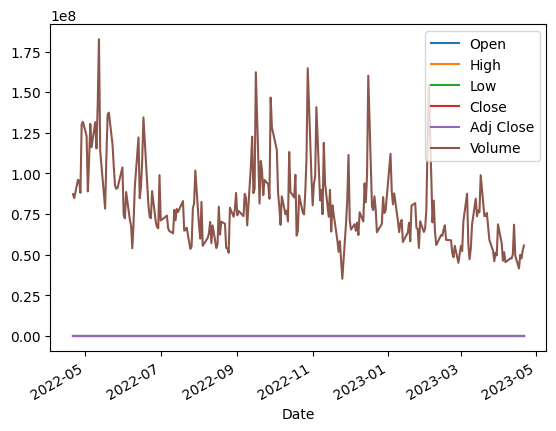

In [ ]:
df.plot()
plt.show()

The resulting plot will show a line graph of the stock prices of Apple Inc. over time, where the x-axis represents the date and the y-axis represents the stock price.

The line graph that results from the dataset's daily stock prices over a number of years can be difficult to comprehend due to the volume of data and noise in the graph. Finding trends or patterns in the data may be challenging.

To lessen the amount of noise in the data and to spot bigger trends, the data are resampled to a coarser time interval, like weekly or monthly averages or aggregations.
Using interactive graphics that let us zoom in and out of various graph regions or show more details when the mouse is hovered over specific data points.
To add additional context and clarity to the information the graph is providing, more descriptive axis names, titles, and annotations should be added.

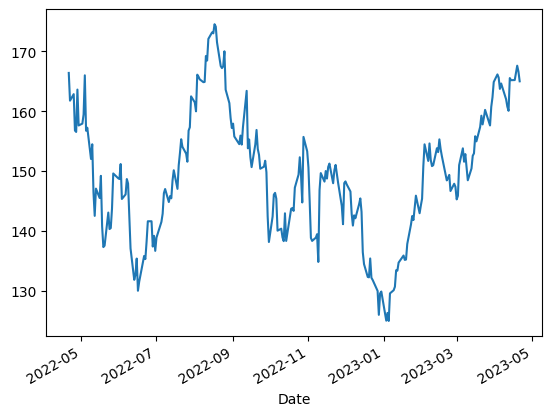

In [ ]:
df['Close'].plot()
plt.show()

The resulting graph of the 'close' variable provides a clearer view of how Apple Inc.'s closing stock price has changed over time.

As a result, the graph is simpler to understand and we are able to concentrate on the particular trend we are interested in rather than becoming overwhelmed by the full information.

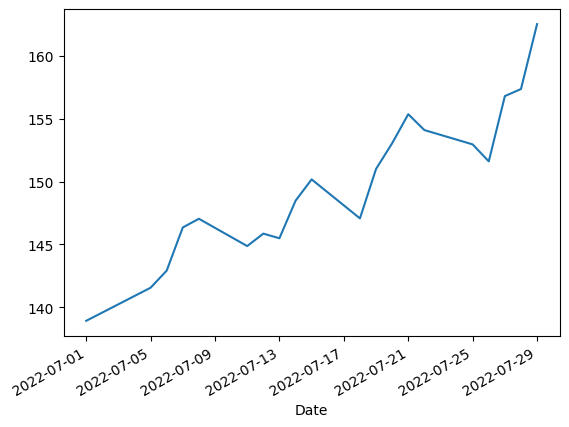

In [ ]:
df['Close']['2022-07-01':'2022-07-31'].plot()
plt.show()

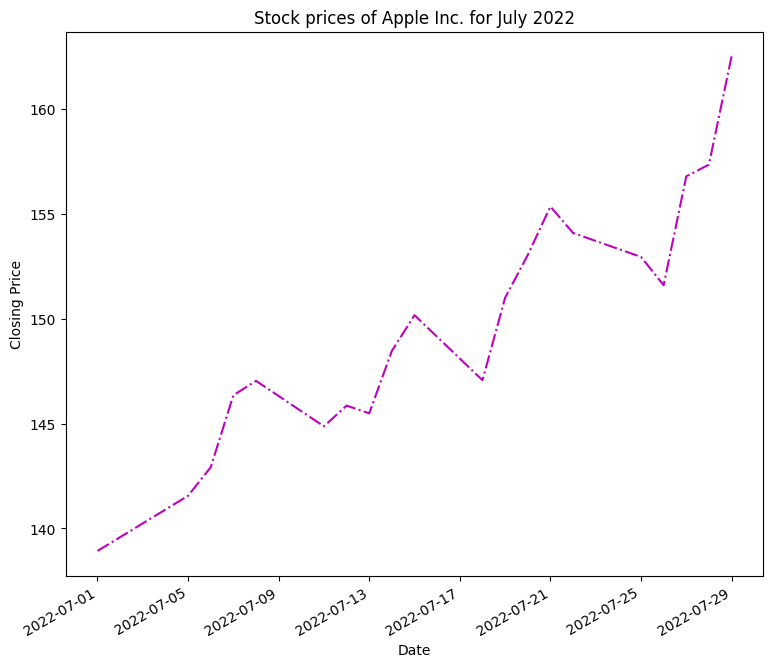

In [ ]:
fig, ax = plt.subplots(figsize=(9 , 8))
df['Close']['2022-07-01':'2022-07-31'].plot(color='m', linestyle='-.', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Stock prices of Apple Inc. for July 2022')
plt.show()

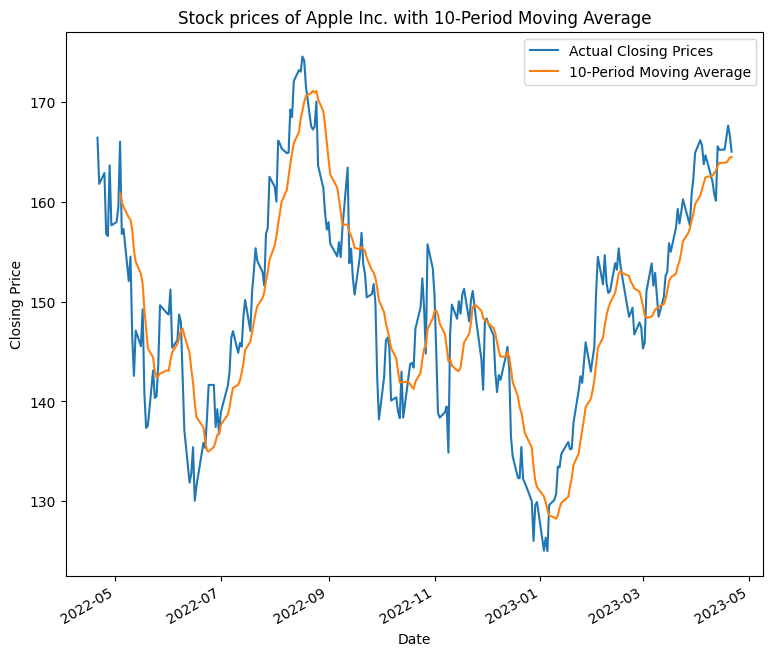

In [ ]:
moving_average_10= df['Close'].rolling(window=10).mean()

fig, ax = plt.subplots(figsize=(9, 8))
df['Close'].plot(ax=ax, label='Actual Closing Prices')
moving_average_10.plot(ax=ax, label='10-Period Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Stock prices of Apple Inc. with 10-Period Moving Average')
plt.legend()
plt.show()

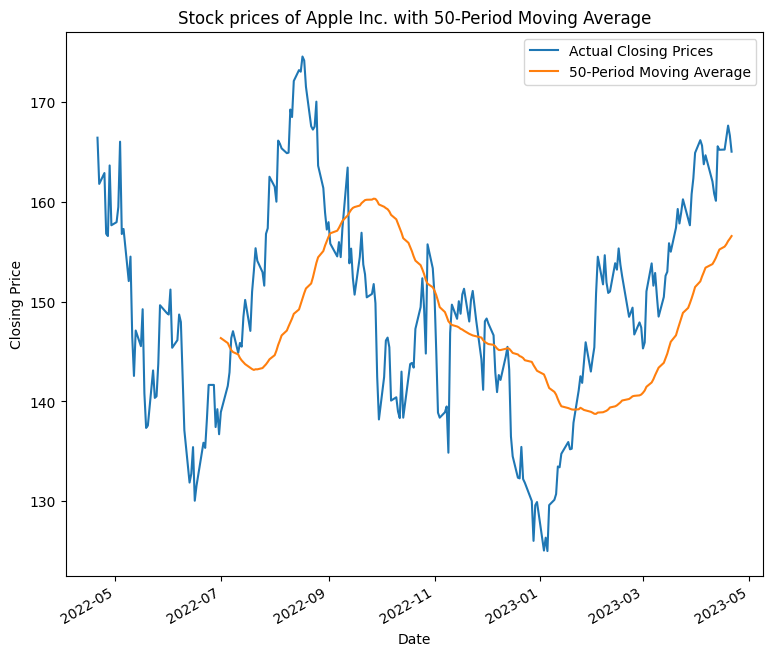

In [ ]:
moving_average_50 = df['Close'].rolling(window=50).mean()
fig, ax = plt.subplots(figsize=(9, 8))
df['Close'].plot(ax=ax, label='Actual Closing Prices')
moving_average_50.plot(ax=ax, label='50-Period Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Stock prices of Apple Inc. with 50-Period Moving Average')
plt.legend()
plt.show()

Here the main difference between the 2 moving averages is that the 10-period moving avergae is more sensitive to short term fluctuations in data, while the 50-period moving average is more receptive of long term trends 
Pros of using shorter moving average window is that it is more sensitive towards short term fluctuations in data. This can be key to providing insights that are related to the short term targets of the company. This is useful in responding quickly to changes in data for example stock trading. Short moving averages however are more prone to false signals which can hinder the decision making process. The pros to using longer moving average is that it is more sensitive to long term trends and is less volatile as compared to short moving averages. The drawbacks are that it tends to be slow to respond to changes resulting in delays in decision making. 

In [ ]:
df_quart = df.resample('Q')['Close'].mean()
df_quart.head()

Date
2022-06-30    146.501225
2022-09-30    156.950468
2022-12-31    142.911110
2023-03-31    147.551129
2023-06-30    164.637144
Freq: Q-DEC, Name: Close, dtype: float64

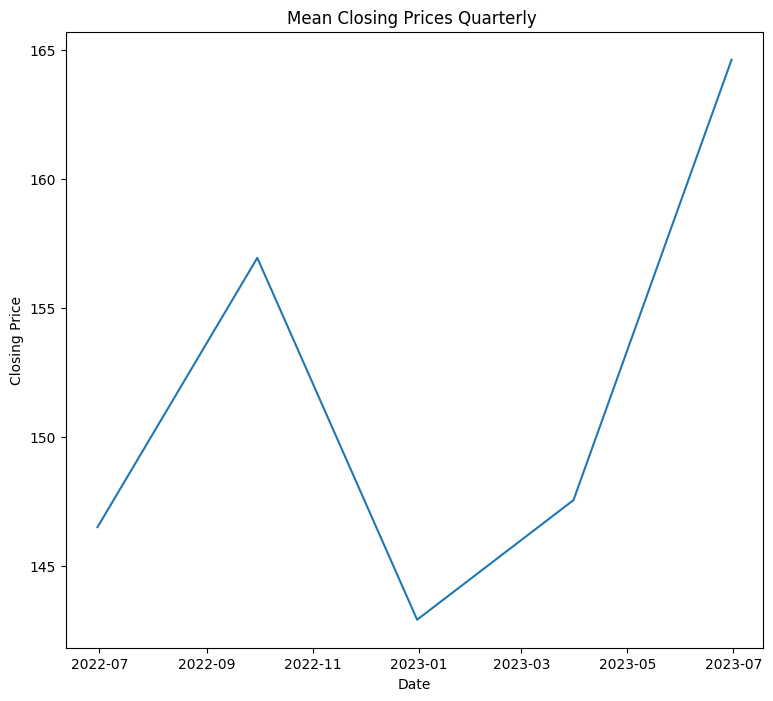

In [ ]:
plt.figure(figsize=(9, 8))
plt.plot(df_quart)
plt.title('Mean Closing Prices Quarterly ')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

**Part II: Marketing Mix Modeling with an Interaction Term**

In [ ]:
import pandas as pd

# Importing Apple Inc. historical stock prices dataset
df2 = pd.read_excel("schwab_ads.xlsx")

# Displaying the first five rows of the dataset
print(df2.head())


     Web  Bus_Stop  Newspaper  Sales
0  230.1      37.8       69.2   22.1
1   44.5      39.3       45.1   10.4
2   17.2      45.9       69.3   12.0
3  151.5      41.3       58.5   16.5
4  180.8      10.8       58.4   17.9


In [ ]:
df2['Total Spending'] = df2['Web'] + df2['Bus_Stop'] + df2['Newspaper']

print(df2.head())


     Web  Bus_Stop  Newspaper  Sales  Total Spending
0  230.1      37.8       69.2   22.1           337.1
1   44.5      39.3       45.1   10.4           128.9
2   17.2      45.9       69.3   12.0           132.4
3  151.5      41.3       58.5   16.5           251.3
4  180.8      10.8       58.4   17.9           250.0


In [ ]:
corr = df2['Total Spending'].corr(df2['Sales'])

print("Correlation coefficient between total spening and sales", corr)


Correlation coefficient between total spening and sales 0.924917006249931


**The correlation between the Total spending and Sales is close to 1 that is it is highly positively correlated**

In [ ]:
corr2 = df2[['Web', 'Bus_Stop', 'Newspaper']].corr()
print(corr2)


                Web  Bus_Stop  Newspaper
Web        1.000000  0.054809   0.056648
Bus_Stop   0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


Correlation between 'Total Spending' and 'Sales' that was calculated suggests that there is a correlation between these 2 variables but it doesnt necessarily indicate a causal relationship. In other words, we can see that as advertising spending rises, sales generally follow suit. We cannot, however, infer from this link alone that increased advertising expenditures result in increased sales. While correlation might shed light on the connections between different variables, it is unable to prove causation on its own. We must devise experiments or employ alternative techniques that can account for confounding variables and isolate the impact of the variable of interest in order to establish a causal relationship.


**No the correlations are not too high**

In [ ]:
model1 = sm.formula.ols(formula='Sales ~ Web + Bus_Stop + Newspaper', data=df2).fit()
print(model1.summary())
f_stat = model1.f_pvalue
print("P-value of F-Statistic: ", f_stat)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           8.13e-99
Time:                        20:32:06   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [ ]:
pvalues = model1.pvalues[1:]
print('P-values for individual predictors')
print(pvalues)



P-values for individual predictors
Web          1.892945e-95
Bus_Stop     4.602097e-27
Newspaper    9.538145e-01
dtype: float64


In [ ]:
import statsmodels.formula.api as smf
formula = 'Sales ~ Web + Bus_Stop + Web:Bus_Stop'
model2 = smf.ols(formula=formula, data=df2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          3.90e-104
Time:                        20:34:14   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.1926      0.410     15.101   

In [ ]:
formula = 'Sales ~ Web + Bus_Stop'
model3 = smf.ols(formula=formula, data=df2).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          2.39e-100
Time:                        20:36:07   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.0

The 'P>|t|' column of the summary table contains the p-values for each predictor in the model. The p-values for Web and Bus_Stop ad spending in the model with the interaction term are both less than 0.05, showing that both variables are statistically significant predictors of Sales. A substantial interaction effect between the Web and Bus_Stop ad spending factors is indicated by the fact that the p-value for the interaction term, "Web:Bus_Stop," is likewise less than 0.05.
Overall, these findings imply that spending on Web and Bus_Stop advertisements has a considerable impact on sales and that the interplay between these two variables significantly affects how effective marketing expenditures are.




In [ ]:
print('R-squared (interaction):', model2.rsquared)
print('R-squared (no interaction):', model3.rsquared)


R-squared (interaction): 0.9140400446988947
R-squared (no interaction): 0.9025896186081139


In [ ]:
df2_new = {'Web': 220, 'Bus_Stop': 30}
predicted_sales = model2.predict(df2_new)
print('Predicted Sales ', predicted_sales[0])


Predicted Sales  19.97259399723719


The R-squared value for each model will be displayed in the output.
Based on the findings, it is clear that the model with the interaction term's R-squared value (0.9140) is greater than the model without the interaction term's R-squared value (0.9025). This shows that the model's capacity to account for Sales fluctuation is enhanced by the inclusion of the interaction component. The interaction effect between Web and Bus_Stop ad expenditure is an essential aspect in forecasting Sales, and omitting this interaction could result in a less accurate model, according to the higher R-squared value for the model with the interaction term.



For the interactive term, I decided to look at minutes played, points scored and impact score. Here the minutes played and the points scored have a correlation and the more the number of minutes played gives the player more chances to get more points. The impact will give the overall stat of how many points the player scored with the minutes they have played. Here the impact score is dependent on the minutes played and points they have scored. 